In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer 

In [13]:
xtest = pd.read_csv("test.csv")
xtrain = pd.read_csv("train.csv")

In [14]:
#Here we appropriately separate our features from our output column.
X = xtrain.drop(['SalePrice'], axis=1)
y = xtrain['SalePrice']
listedX = xtest[list(xtest)]

In [15]:
#Convert categorical data to numeric
changeMetric = pd.get_dummies(X)
changedMetric = pd.get_dummies(listedX)
xtrain, xtest = changeMetric.align(changedMetric, join='left', axis=1)

In [16]:
#Imputer is used to fill in missing data with appropriate values. ex:) data = [1,2,3,NA] NA will be filled with 4
filler = Imputer()
filledTrain = filler.fit_transform(xtrain)
filledTest = filler.transform(xtest)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
#Here we create our DecisionTree model and fit it to our filled Data, we also create our prediction variable
dTree=DecisionTreeRegressor()
clf = dTree.fit(filledTrain,y)
prediction = dTree.predict(filledTest)

In [18]:
#For submission purposes we create our output dataframe and then write it to a csv file
output = pd.DataFrame({'ID': xtest.Id, 'SalePrice': prediction})
output.to_csv('output.csv',index=False)

In [23]:
from sklearn import tree
import graphviz
from IPython.display import Image
import pydotplus 
from graphviz import Source


labels = list(xtest.columns.values)
#Here we visualize our decision tree
dot_data =tree.export_graphviz(clf, out_file=None, feature_names = labels, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
img = Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.388958 to fit



In [24]:
img

In [39]:
xGraph = [3,5,7,9,20]
yGraph = [0.25879, 0.21482, 0.20258, 0.19862, 0.20691]

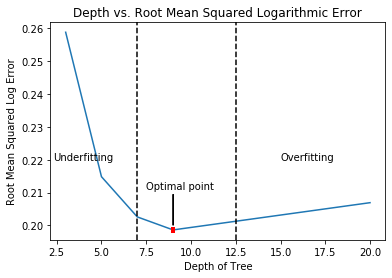

In [99]:
import matplotlib.pyplot as plt
plt.plot(xGraph, yGraph)
plt.title('Depth vs. Root Mean Squared Logarithmic Error')
plt.ylabel('Root Mean Squared Log Error')
plt.xlabel('Depth of Tree')
plt.arrow(9,.20, 0, .005)
plt.text(7.5,.211, "Optimal point")
plt.axvline(x=12.5, color = 'black', ls='--')
plt.axvline(x=7, color = "black", ls='--')
plt.axvline(x=9, ymax=.05,ymin=.04, color = "red", ls='-', lw='4')
plt.text(15,.22, "Overfitting")
plt.text(2.3,.22, "Underfitting")
plt.show()